In [23]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from std_msgs.msg import String
#from deepface import DeepFace

In [24]:
import sys
#sys.path.remove('/opt/ros/melodic/lib/python2.7/dist-packages')## SI NO TIENEN ROS COMENTEN ESTA LINEA
import cv2
from cv_bridge import CvBridge, CvBridgeError
bridge = CvBridge()


In [25]:

from deepface import DeepFace

In [26]:
import rospy
import face_recognition
from sensor_msgs.msg import Image , LaserScan , PointCloud2
rospy.init_node("face_recognition")
from hmm_navigation.msg import NavigateActionGoal , NavigateActionResult   ###BETA OPTIONAL


In [27]:
from  smach_utils2 import *

the rosdep view is empty: call 'sudo rosdep init' and 'rosdep update'


ROSException: rospy.init_node() has already been called with different arguments: ('face_recognition', ['/home/oscar/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '-f', '/home/oscar/.local/share/jupyter/runtime/kernel-38db2103-7c8d-4cc4-96b4-163ecd7c5ad8.json'], False, None, False, False)

In [28]:
path_for_faces='/home/oscar/Pictures/faces_for_recognition/'## A USER MUST SOURCE PATH TO  FACES DATASET MUST BE 

In [6]:
a

NameError: name 'a' is not defined

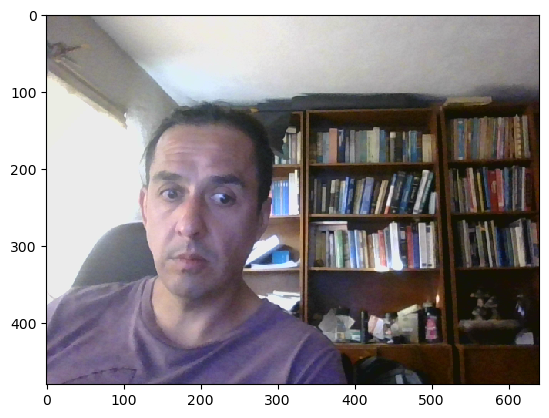

In [29]:
data = rospy.wait_for_message("/usb_cam/image_raw",Image) ### FOR DEBUGGING: WHEN USING ROBOT PLEASE CHANGE THIS TOPIC ACCORDINGLY
cv2_img = bridge.imgmsg_to_cv2(data)#, "bgr8")
plt.imshow(cv2_img)
image=np.copy(cv2_img)

In [38]:
DeepFace.extract_faces(image)

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

In [31]:
from face_recog.msg import *

In [32]:
from face_recog.srv import *

In [33]:
def train_face(image, name):
    req=RecognizeFaceRequest()
    strings=Strings()
    string_msg= String()
    string_msg.data=name
    req.Ids.ids.append(string_msg)

    img_msg=bridge.cv2_to_imgmsg(image)
    req.in_.image_msgs.append(img_msg)
    res=train_new_face(req)
    return res.Ids.ids[0].data.split(' ')[0] == 'trained'

In [34]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [35]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')
rospy.wait_for_service('analyze_face')


In [36]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    
analyze = rospy.ServiceProxy('analyze_face', RecognizeFace)    

In [46]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
req.in_.image_msgs.append(img_msg)
#res=recognize(req)
res = analyze(req)
res

Ds: 
  data: []
Angs: 
  data: [115.0, 171.0, 156.0, 156.0]
Ids: 
  ids: 
    - 
      data: "Man"
    - 
      data: "white"
    - 
      data: "angry"
    - 
      data: "35"

In [4]:
from smach_utils2 import *

the rosdep view is empty: call 'sudo rosdep init' and 'rosdep update'
[ WARN] [1678138288.862634149]: Link hand_l_finger_vacuum_frame has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1678138288.885788873]: Link head_l_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1678138288.886215567]: Link head_r_stereo_camera_link has visual geometry but no collision geometry. Collision geometry will be left empty. Fix your URDF file by explicitly specifying collision geometry.
[ WARN] [1678138288.887746946]: Group state 'neutral' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [1678138288.888556359]: Group state 'go' doesn't specify all group joints in group 'arm'. wrist_ft_sensor_frame_joint is missing.
[ WARN] [

In [52]:
points=rgbd.get_points()

In [76]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]
    bbox[0]
    for i in np.arange((int)(bbox[0]),(int)(bbox[0])+(int)(bbox[2])):
        for j in np.arange((int)(bbox[1]),(int)(bbox[1])+(int)(bbox[3])):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )
    return np.asarray(xyz).mean(axis=0)

In [73]:
def bbox_3d_mean(points,bbox):
    
    xyz=[]

    for i in np.arange((int)(21.0),(int)(21.0)+(int)(187.0)):
        for j in np.arange((int)(178.0),(int)(178.0)+(int)(344.0)):
            aa=np.asarray(points[['x','y','z']][i,j])
            if np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum() ==0:                   
                xyz.append(np.asarray((aa['x'],aa['y'],aa['z'])) )

In [70]:
x,y,z=xyzz.mean(axis=0)
x,y,z

(0.087547965, -0.38353324, 1.6179111)

In [74]:
bbox=(21,178,187,344)

In [77]:
trans=bbox_3d_mean(points,bbox)
trans

array([ 0.08754797, -0.38353324,  1.6179111 ], dtype=float32)

In [71]:
trans=xyzz.mean(axis=0)
trans[2]+=600
trans

array([ 8.7547965e-02, -3.8353324e-01,  6.0161792e+02], dtype=float32)

In [72]:
points

array([[(-1.1957033 , -0.8963096 , 2.074733  , 1.6396335e-38),
        (-1.1919606 , -0.89630944, 2.0747325 , 1.6488172e-38),
        (-1.1882179 , -0.8963092 , 2.074732  , 1.6488172e-38), ...,
        ( 0.68943644, -0.52006304, 1.2038162 , 2.3509886e-38),
        ( 0.69160765, -0.5200629 , 1.2038158 , 2.3509886e-38),
        ( 0.693779  , -0.5200628 , 1.2038156 , 2.3509886e-38)],
       [(-1.1925887 , -0.8902423 , 2.0693288 , 1.6396335e-38),
        (-1.1888558 , -0.89024204, 2.0693283 , 1.6304141e-38),
        (-1.1851228 , -0.89024186, 2.0693278 , 1.6304141e-38), ...,
        ( 0.68764085, -0.51654285, 1.200681  , 2.3509886e-38),
        ( 0.68980646, -0.5165427 , 1.2006806 , 2.3509886e-38),
        ( 0.69197214, -0.51654255, 1.2006804 , 2.3509886e-38)],
       [(-1.1894903 , -0.8842064 , 2.0639527 , 1.6396335e-38),
        (-1.1857669 , -0.8842061 , 2.063952  , 1.6304141e-38),
        (-1.1820438 , -0.88420606, 2.0639517 , 1.6396337e-38), ...,
        ( 0.6858546 , -0.51304084, 1.1

In [56]:
aux=(points[['x','y','z']][-20,410])
#np.isnan(aux)
aa=np.asarray(aux)
np.isnan(np.asarray((aa['x'],aa['y'],aa['z']))).sum()==0

True

[ WARN] [1678139555.330875865, 238.665000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 238.665000 according to authority /pose_integrator
[ WARN] [1678139555.330932233, 238.665000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 238.665000 according to authority /pose_integrator
[ WARN] [1678139555.330955675, 238.665000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 238.665000 according to authority /pose_integrator
[ WARN] [1678139555.330984275, 238.665000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 238.665000 according to authority /pose_integrator
[ WARN] [1678139555.331330629, 238.665000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 238.665000 according to authority unknown_publisher


In [25]:
21.0, 178.0, 187.0, 344.0
for i 

aux=(points[['x','y','z']][-20,410])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

[ WARN] [1678138725.923177069, 101.322000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 101.337000 according to authority /pose_integrator
[ WARN] [1678138725.923239199, 101.322000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 101.337000 according to authority /pose_integrator
[ WARN] [1678138725.923264339, 101.322000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 101.337000 according to authority /pose_integrator
[ WARN] [1678138725.923285781, 101.322000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 101.337000 according to authority /pose_integrator
[ WARN] [1678138725.924841789, 101.322000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 101.337000 according to authority unknown_publisher
[ WARN] [1678138728.519904910, 101.832000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

[ WARN] [1678138755.688241399, 106.932000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 106.980000 according to authority /pose_integrator
[ WARN] [1678138755.688315633, 106.932000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 106.980000 according to authority /pose_integrator
[ WARN] [1678138755.688350428, 106.932000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 106.980000 according to authority /pose_integrator
[ WARN] [1678138755.688372684, 106.932000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 106.980000 according to authority /pose_integrator
[ WARN] [1678138755.702630875, 106.980000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 106.980000 according to authority unknown_publisher
[ WARN] [1678138765.484692700, 108.840000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

[ WARN] [1678138784.466065698, 111.972000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 111.972000 according to authority /pose_integrator
[ WARN] [1678138784.466114250, 111.972000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 111.972000 according to authority /pose_integrator
[ WARN] [1678138784.466137746, 111.972000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 111.972000 according to authority /pose_integrator
[ WARN] [1678138784.466158062, 111.972000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 111.972000 according to authority /pose_integrator
[ WARN] [1678138784.479874515, 111.972000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 111.972000 according to authority unknown_publisher
[ WARN] [1678138789.540755639, 112.863000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame o

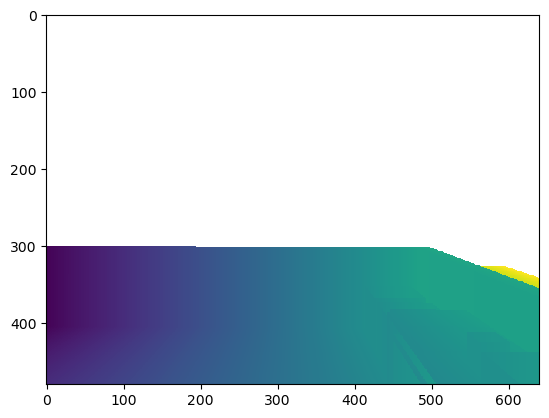

[ WARN] [1678138580.361903151, 73.422000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 73.422000 according to authority unknown_publisher
[ WARN] [1678138580.362381208, 73.422000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 73.422000 according to authority /pose_integrator
[ WARN] [1678138580.362420487, 73.422000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 73.422000 according to authority /pose_integrator
[ WARN] [1678138580.362444032, 73.422000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 73.422000 according to authority /pose_integrator
[ WARN] [1678138580.362465490, 73.422000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 73.422000 according to authority /pose_integrator
[ WARN] [1678138594.469306441, 76.191000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time

[ WARN] [1678138625.711999828, 81.945000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 81.987000 according to authority /pose_integrator
[ WARN] [1678138625.712048044, 81.945000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 81.987000 according to authority /pose_integrator
[ WARN] [1678138625.712072134, 81.945000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 81.987000 according to authority /pose_integrator
[ WARN] [1678138625.712096684, 81.945000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 81.987000 according to authority /pose_integrator
[ WARN] [1678138625.712669528, 81.987000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 81.987000 according to authority unknown_publisher
[ WARN] [1678138626.231673162, 82.089000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time

[ WARN] [1678138665.138544037, 90.231000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 90.237000 according to authority unknown_publisher
[ WARN] [1678138665.140173394, 90.231000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 90.237000 according to authority /pose_integrator
[ WARN] [1678138665.140278858, 90.231000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 90.237000 according to authority /pose_integrator
[ WARN] [1678138665.140318272, 90.231000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 90.237000 according to authority /pose_integrator
[ WARN] [1678138665.140354426, 90.231000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 90.237000 according to authority /pose_integrator
[ WARN] [1678138666.645970006, 90.348000000]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time

In [22]:
plt.imshow (points['x'])

In [3]:
data=(21.0, 178.0, 187.0, 344.0)
data

(21.0, 178.0, 187.0, 344.0)

In [ ]:
try:
    res=DeepFace.extract_faces(image )
    print ('face found')
    dfs = DeepFace.find(image,path_for_faces)
    print('id',dfs[0]['identity'].iloc[0].split('/')[-2])
except(ValueError): 
    print('No Face')

In [ ]:
#### DISPLAY IMAGE?#############3
#obj=res
pt1 = res[0]['facial_area']['x'],res[0]['facial_area']['y'] 
pt2=  res[0]['facial_area']['x']+res[0]['facial_area']['w'] , res[0]['facial_area']['y']+ res[0]['facial_area']['h']
img=cv2.rectangle(image, pt1,pt2, (0, 0, 255), 2)
img = cv2.putText(img, dfs[0]['identity'].iloc[0].split('/')[-2], pt1, cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (255, 0, 0), 2, cv2.LINE_AA)
   


In [ ]:
plt.imshow(cv2_img)

In [ ]:
plt.imshow(img)

In [ ]:
dfs = DeepFace.find(image,path_for_faces)
dfs[0]['identity'].iloc[0].split('/')[-2]

In [ ]:

dfs = DeepFace.find(image,path_for_faces)

In [13]:
from deepface import DeepFace

2023-03-06 16:38:08.881568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 16:38:10.140527: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/oscar/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-11.5/lib64:/home/oscar/catkin_extras/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu
2023-03-06 16:38:10.140934: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared obje

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [43]:
objs = DeepFace.analyze(image, 
        actions = ['age', 'gender', 'race', 'emotion']
)

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [22]:
objs

NameError: name 'objs' is not defined

In [20]:
objs[0]['region']

NameError: name 'objs' is not defined

In [25]:
objs[0]['dominant_gender'],objs[0]['dominant_race'],objs[0]['dominant_emotion'],objs[0]['age']

('Man', 'middle eastern', 'sad', 42)

In [26]:
for st in (objs[0]['dominant_gender'],objs[0]['dominant_race'],objs[0]['dominant_emotion'],objs[0]['age']):
    print (st)

Man
middle eastern
sad
42


In [42]:
objs[0]['age']

NameError: name 'objs' is not defined

In [ ]:
from face_recog.msg import *

In [ ]:
from face_recog.srv import *

In [ ]:
def train_face(image, name):
    req=RecognizeFaceRequest()
    strings=Strings()
    string_msg= String()
    string_msg.data=name
    req.Ids.ids.append(string_msg)

    img_msg=bridge.cv2_to_imgmsg(image)
    req.in_.image_msgs.append(img_msg)
    res=train_new_face(req)
    return res.Ids.ids[0].data.split(' ')[0] == 'trained'

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)

rospy.wait_for_service('recognize_face')

In [ ]:
### LAUNCH SERVICE OR WAIT FOREVER (VALOR MORGULIS)
rospy.wait_for_service('new_face')


In [ ]:
train_new_face = rospy.ServiceProxy('new_face', RecognizeFace)    
recognize = rospy.ServiceProxy('recognize_face', RecognizeFace)    

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='any'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(cv2_img)
req.in_.image_msgs.append(img_msg)
res=recognize(req)
res

In [ ]:
plt.imshow(cv2_img)

In [ ]:
req=RecognizeFaceRequest()

strings=Strings()
string_msg= String()
string_msg.data='Test'
req.Ids.ids.append(string_msg)

img_msg=bridge.cv2_to_imgmsg(image)
req.in_.image_msgs.append(img_msg)




In [ ]:
res=train_new_face(req)  ### FOR TRAINING! IF NAME IS REPETAED WILL CRASH
res

In [ ]:
###################Using Navigation to get to a Distance from this face$$

In [ ]:
listener = tf.TransformListener()
broadcaster = tf.TransformBroadcaster()
pub_goal= rospy.Publisher('/navigate/goal', NavigateActionGoal, queue_size=1)

In [ ]:
d=res.Ds.data[0]
D_to_person=0.15
pose=np.zeros(3)
pose[2]+=d - D_to_person
quat=np.zeros(4)
quat[-1]=1
    

broadcaster.sendTransform(pose, quat,rospy.Time.now(), 'face','head_rgbd_sensor_link')
for i in range (10):
    try:
        goal_pose, quat=listener.lookupTransform( 'map','face', rospy.Time(0))
        print('yes tf')
        break
    except:
        print  ('No tf')
        rospy.sleep(0.2)

In [ ]:

goal_pose
goal= NavigateActionGoal()
goal.goal.x=goal_pose[0]
goal.goal.y=goal_pose[1]

goal.goal.timeout= 10
nav_res= NavigateActionResult()
pub_goal.publish(goal)

In [ ]:
image

In [ ]:
from smach_utils2 import *

In [ ]:
res= speech_recog_server()

In [ ]:
res.data

In [ ]:
res2=train_face(image,res.data)


In [ ]:
res2.Ids.ids[0].data.split(' ')[0] == 'trained'

In [ ]:
train_face(image,res.data)

In [ ]:
req

In [ ]:

from smach_utils2 import *